## Home Task
### Get practice with various **metrics** for various **datasets** for  various **models**


In [119]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, f1_score, roc_auc_score, \
    classification_report, make_scorer, PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay


#### **MNIST dataset**

In [120]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_train.shape[1]
X_train = X_train.reshape(m_train, -1) / 255
X_test = X_test.reshape(m_test, -1) / 255

np.random.seed(42)
train_idx = np.random.choice(np.arange(m_train), 1000, replace=False)
X_train = X_train[train_idx]
y_train = y_train[train_idx]

test_idx = np.random.choice(np.arange(m_test), 200, replace=False)
X_test = X_test[test_idx]
y_test = y_test[test_idx]

print ('X_train.shape =', X_train.shape)
print ('X_test.shape =', X_test.shape)
print ('y_train.shape =', y_train.shape)
print ('y_test.shape =', y_test.shape)
y_train[:10]

X_train.shape = (1000, 784)
X_test.shape = (200, 784)
y_train.shape = (1000,)
y_test.shape = (200,)


array([7, 3, 8, 9, 3, 9, 7, 7, 5, 4], dtype=uint8)

#### **Binary version of MNIST dataset**

In [121]:
y_train_binary = (y_train == 4).astype(int)
y_test_binary = (y_test == 4).astype(int)
print(np.bincount(y_train_binary))
print(np.bincount(y_test_binary))

[905  95]
[181  19]


#### **Different metrics**

In [122]:
def display_metrics(clf, X_test, y_test, y_pred, multiclass=False):
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    if not multiclass:
        print('Precision score:', precision_score(y_test, y_pred, zero_division=0))
        print('Recall score:', recall_score(y_test, y_pred, zero_division=0))
        print('Average precision score:', average_precision_score(y_test, y_pred))
    else:
        print('Precision macro score:', precision_score(y_test, y_pred, average='macro', zero_division=0))
        print('Recall macro score:', recall_score(y_test, y_pred, average='macro', zero_division=0))
        print('F1 macro score:', f1_score(y_test, y_pred, average='macro', zero_division=0))
        print('Precision micro score:', precision_score(y_test, y_pred, average='micro', zero_division=0))
        print('Recall micro score:', recall_score(y_test, y_pred, average='micro', zero_division=0))
        print('F1 micro score:', f1_score(y_test, y_pred, average='micro', zero_division=0))
    
    if not multiclass:
        PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
        plt.title('Precision-Recall Curve')
        plt.show()

    if not multiclass:
        print('F1 score:', f1_score(y_test, y_pred, zero_division=0))
        print('ROC AUC score:', roc_auc_score(y_test, y_pred))
    else:
        print('F1 macro score:', f1_score(y_test, y_pred, zero_division=0, average='macro'))
        print('ROC AUC macro score:', roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovo'))
        print('F1 micro score:', f1_score(y_test, y_pred, zero_division=0, average='micro'))
        print('ROC AUC weighted score:', roc_auc_score(y_test, clf.predict_proba(X_test), average='weighted', multi_class='ovo'))

    if not multiclass:
        RocCurveDisplay.from_estimator(clf, X_test, y_test)
        plt.title('ROC Curve')
        plt.show()

    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    plt.title('Confusion Matrix')
    plt.show()

    print('Classification report:')
    print(classification_report(y_test, y_pred, zero_division=0))

    print('Cross validation scores:')
    print('Accuracy:', cross_val_score(clf, X_test, y_test, cv=10))

    if not multiclass:
        print('Precision:', cross_val_score(clf, X_test, y_test, cv=10,
                                            scoring=make_scorer(precision_score, zero_division=0)))
        print('Recall:', cross_val_score(clf, X_test, y_test, cv=10, 
                                            scoring=make_scorer(recall_score, zero_division=0)))
        print('F1:', cross_val_score(clf, X_test, y_test, cv=10,
                                            scoring=make_scorer(f1_score, zero_division=0)))
        print('Area under ROC curve:', cross_val_score(clf, X_test, y_test, cv=10, scoring='roc_auc'))
        print('Average precision:', cross_val_score(clf, X_test, y_test, cv=10, scoring='average_precision'))
    else:
        print('Precision macro:', cross_val_score(clf, X_test, y_test, cv=10,
                                            scoring=make_scorer(precision_score, average='macro', zero_division=0)))
        print('Recall macro:', cross_val_score(clf, X_test, y_test, cv=10, 
                                            scoring=make_scorer(recall_score, average='macro', zero_division=0)))
        print('F1 macro:', cross_val_score(clf, X_test, y_test, cv=10, 
                                            scoring=make_scorer(f1_score, average='macro', zero_division=0)))



#### **Dummy Classifier**

Accuracy score: 0.905
Precision score: 0.0
Recall score: 0.0
Average precision score: 0.095


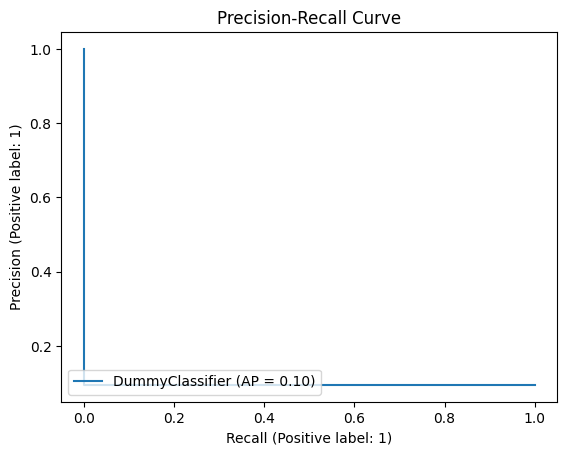

F1 score: 0.0
ROC AUC score: 0.5


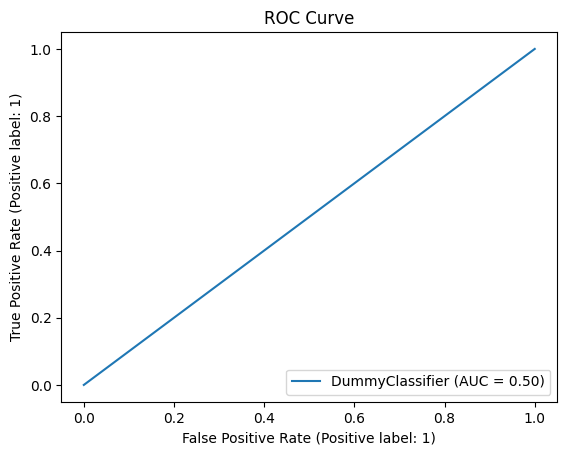

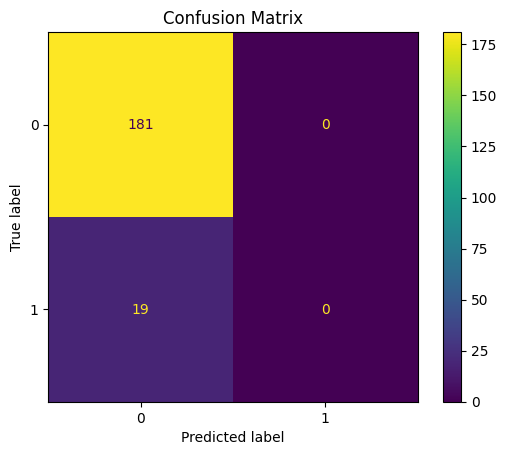

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

Cross validation scores:
Accuracy: [0.95 0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9 ]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Area under ROC curve: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Average precision: [0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]


In [123]:
clf = DummyClassifier(strategy='most_frequent', random_state=42).fit(X_train, y_train_binary)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test_binary, y_pred)

#### **K Nearest Neighbours Classifier**

Accuracy score:

 0.975
Precision score: 0.8888888888888888
Recall score: 0.8421052631578947
Average precision score: 0.7635380116959064


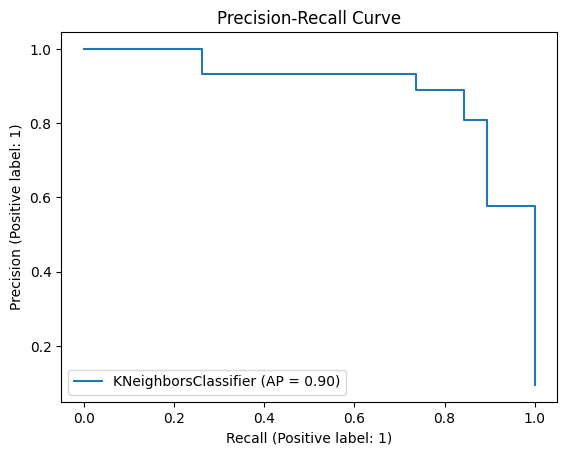

F1 score: 0.8648648648648649
ROC AUC score: 0.9155277697004943


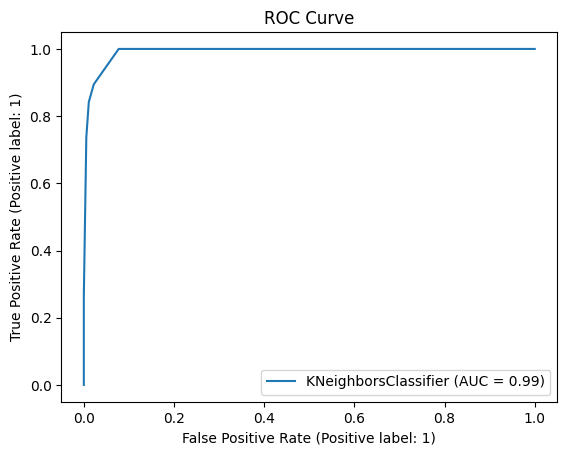

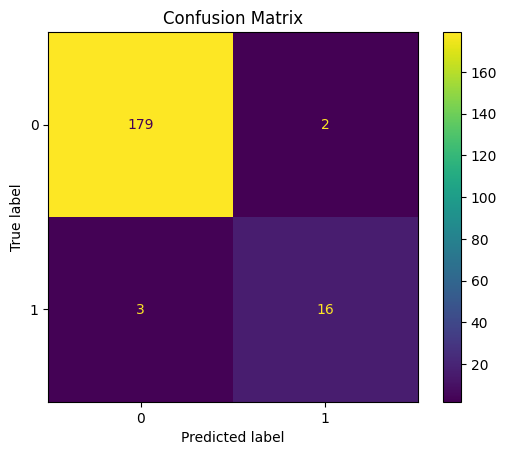

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       181
           1       0.89      0.84      0.86        19

    accuracy                           0.97       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.97      0.97      0.97       200

Cross validation scores:
Accuracy: [0.95 0.95 0.9  1.   1.   0.9  1.   0.9  1.   0.9 ]
Precision: [0.5 1.  0.  1.  1.  0.5 1.  0.  1.  0. ]
Recall: [1.  0.5 0.  1.  1.  0.5 1.  0.  1.  0. ]
F1: [0.66666667 0.66666667 0.         1.         1.         0.5
 1.         0.         1.         0.        ]
Area under ROC curve: [1.         1.         1.         1.         1.         0.97222222
 1.         0.70833333 1.         0.95833333]
Average precision: [1.         1.         1.         1.         1.         0.83333333
 1.         0.3        1.         0.7       ]


In [124]:
clf = KNeighborsClassifier().fit(X_train, y_train_binary)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test_binary, y_pred)

#### **Logistic Regression Classifier**

Accuracy score: 0.98
Precision score: 0.8260869565217391
Recall score: 1.0
Average precision score: 0.8260869565217391


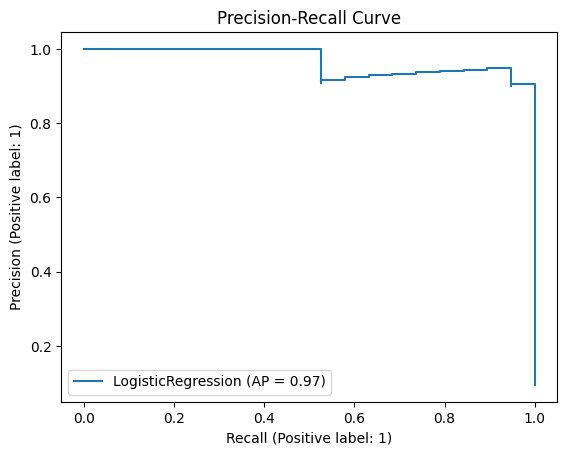

F1 score: 0.9047619047619047
ROC AUC score: 0.988950276243094


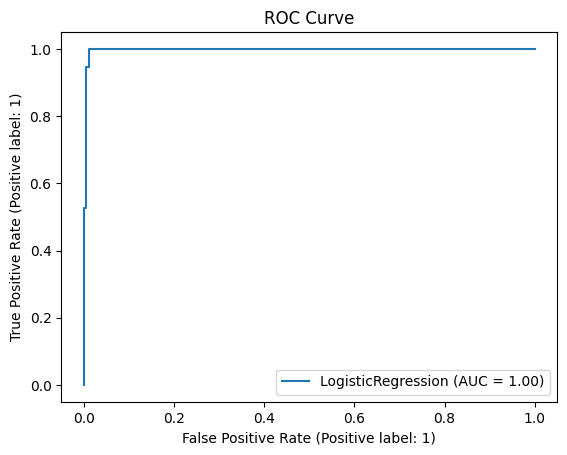

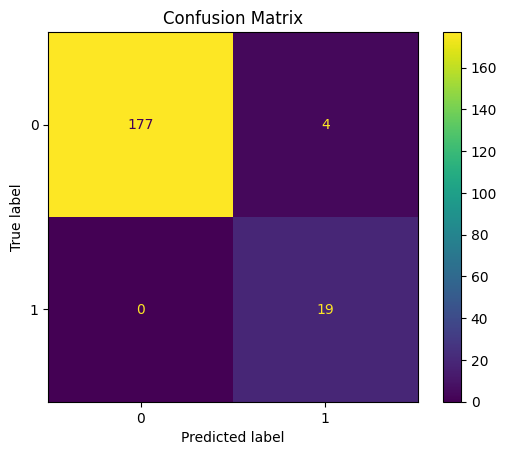

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       181
           1       0.83      1.00      0.90        19

    accuracy                           0.98       200
   macro avg       0.91      0.99      0.95       200
weighted avg       0.98      0.98      0.98       200

Cross validation scores:
Accuracy: [0.95 1.   0.9  1.   1.   0.95 0.95 0.9  1.   0.95]
Precision: [0.5 1.  0.  1.  1.  1.  1.  0.  1.  1. ]
Recall: [1.  1.  0.  1.  1.  0.5 0.5 0.  1.  0.5]
F1: [0.66666667 1.         0.         1.         1.         0.66666667
 0.66666667 0.         1.         0.66666667]
Area under ROC curve: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.97222222]
Average precision: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.83333333]


In [125]:
clf = LogisticRegression().fit(X_train, y_train_binary)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test_binary, y_pred)


#### **Supporting Vectors Classifier**

Accuracy score: 0.915
Precision macro score: 0.9121604010025063
Recall macro score: 0.909180378482438
F1 macro score: 0.9072162103022821
Precision micro score: 0.915
Recall micro score: 0.915
F1 micro score: 0.915
F1 macro score: 0.9072162103022821
ROC AUC macro score: 0.9909475198791606
F1 micro score: 0.915
ROC AUC weighted score: 0.9912063698901036


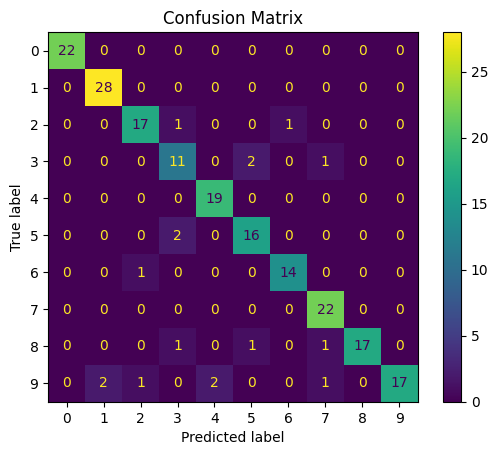

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.93      1.00      0.97        28
           2       0.89      0.89      0.89        19
           3       0.73      0.79      0.76        14
           4       0.90      1.00      0.95        19
           5       0.84      0.89      0.86        18
           6       0.93      0.93      0.93        15
           7       0.88      1.00      0.94        22
           8       1.00      0.85      0.92        20
           9       1.00      0.74      0.85        23

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

Cross validation scores:
Accuracy: [0.9  0.9  0.75 0.85 0.95 0.7  0.8  0.8  0.9  0.75]
Precision macro: [0.93333333 0.93333333 0.73333333 0.88333333 0.96666667 0.67666667
 0.76666667 0.79166667 0.83333333 0.69333333]
R

In [126]:
clf = SVC(kernel='linear', probability=True).fit(X_train, y_train)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test, y_pred, multiclass=True)

#### **Multi-Layer Perceptron Classifier**

Accuracy score: 0.875
Precision macro score: 0.8718579067990833
Recall macro score: 0.8658426534055824
F1 macro score: 0.8629246797486017
Precision micro score: 0.875
Recall micro score: 0.875
F1 micro score: 0.875
F1 macro score: 0.8629246797486017
ROC AUC macro score: 0.9927582676926053
F1 micro score: 0.875
ROC AUC weighted score: 0.9931827218921995


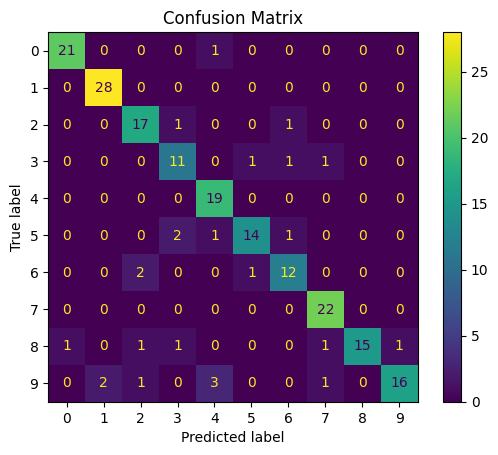

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.93      1.00      0.97        28
           2       0.81      0.89      0.85        19
           3       0.73      0.79      0.76        14
           4       0.79      1.00      0.88        19
           5       0.88      0.78      0.82        18
           6       0.80      0.80      0.80        15
           7       0.88      1.00      0.94        22
           8       1.00      0.75      0.86        20
           9       0.94      0.70      0.80        23

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.88      0.87       200

Cross validation scores:
Accuracy: [0.85 0.85 0.8  0.95 0.95 0.7  0.85 0.85 0.85 0.8 ]
Precision macro: [0.9        0.90833333 0.75       0.78333333 0.94166667 0.66
 0.86666667 0.74166667 0.70833333 0.91666667]
Recall 

In [127]:
clf = MLPClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test, y_pred, multiclass=True)

#### **Decision Tree Classifier**

Accuracy score: 0.71
Precision macro score: 0.6919513519707831
Recall macro score: 0.6877971608864056
F1 macro score: 0.6858156512343705
Precision micro score: 0.71
Recall micro score: 0.71
F1 micro score: 0.7100000000000001
F1 macro score: 0.6858156512343705
ROC AUC macro score: 0.8265539782702255
F1 micro score: 0.7100000000000001
ROC AUC weighted score: 0.8324821661779613


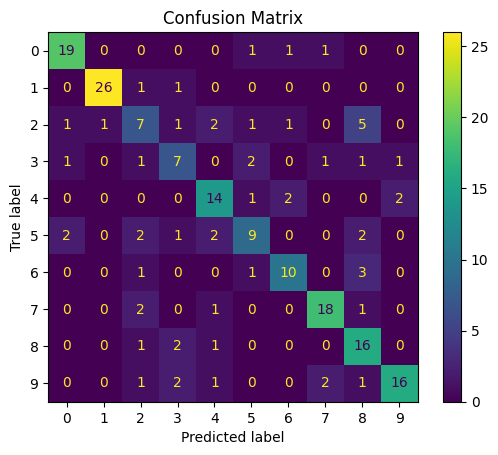

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.96      0.93      0.95        28
           2       0.44      0.37      0.40        19
           3       0.50      0.50      0.50        14
           4       0.67      0.74      0.70        19
           5       0.60      0.50      0.55        18
           6       0.71      0.67      0.69        15
           7       0.82      0.82      0.82        22
           8       0.55      0.80      0.65        20
           9       0.84      0.70      0.76        23

    accuracy                           0.71       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.72      0.71      0.71       200

Cross validation scores:
Accuracy: [0.6  0.7  0.5  0.6  0.55 0.5  0.7  0.55 0.55 0.3 ]
Precision macro: [0.58333333 0.84       0.45       0.6        0.475      0.36166667
 0.475      0.44166667 0.4        0.4       ]
R

In [128]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test, y_pred, multiclass=True)

#### **Random Forest Classifier**

Accuracy score: 0.93
Precision macro score: 0.9283482171821358
Recall macro score: 0.9270453307180995
F1 macro score: 0.9255591399268388
Precision micro score: 0.93
Recall micro score: 0.93
F1 micro score: 0.93
F1 macro score: 0.9255591399268388
ROC AUC macro score: 0.9867604608737968
F1 micro score: 0.93
ROC AUC weighted score: 0.9868645872430675


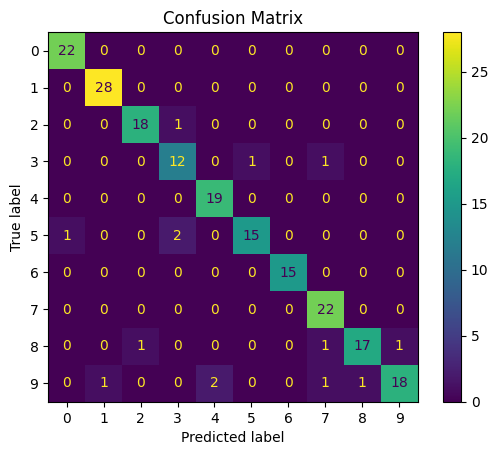

Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.97      1.00      0.98        28
           2       0.95      0.95      0.95        19
           3       0.80      0.86      0.83        14
           4       0.90      1.00      0.95        19
           5       0.94      0.83      0.88        18
           6       1.00      1.00      1.00        15
           7       0.88      1.00      0.94        22
           8       0.94      0.85      0.89        20
           9       0.95      0.78      0.86        23

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Cross validation scores:
Accuracy: [0.9  0.9  0.8  0.8  0.9  0.7  0.9  0.8  0.8  0.65]
Precision macro: [0.96666667 0.875      0.54       0.825      0.96666667 0.66
 0.925      0.74166667 0.81666667 0.49333333]
Recall 

In [129]:
clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test, y_pred, multiclass=True)

#### **Gradient Boosted Tree Classifier**

Accuracy score: 0.765
Precision macro score: 0.7564842662211082
Recall macro score: 0.7478709950105831
F1 macro score: 0.7471784951474139
Precision micro score: 0.765
Recall micro score: 0.765
F1 micro score: 0.765
F1 macro score: 0.7471784951474139
ROC AUC macro score: 0.9563119239949265
F1 micro score: 0.765
ROC AUC weighted score: 0.9589829624107848


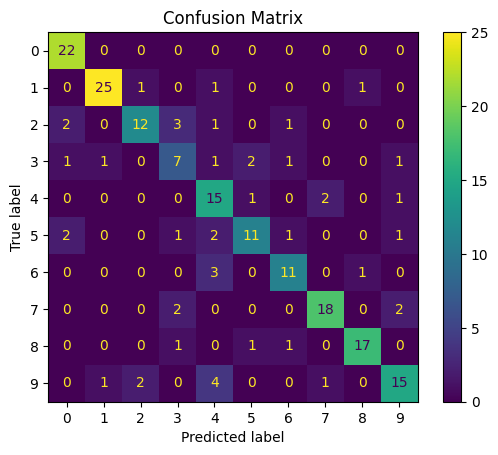

Classification report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       0.93      0.89      0.91        28
           2       0.80      0.63      0.71        19
           3       0.50      0.50      0.50        14
           4       0.56      0.79      0.65        19
           5       0.73      0.61      0.67        18
           6       0.73      0.73      0.73        15
           7       0.86      0.82      0.84        22
           8       0.89      0.85      0.87        20
           9       0.75      0.65      0.70        23

    accuracy                           0.77       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.77      0.77      0.76       200

Cross validation scores:
Accuracy: [0.6  0.75 0.7  0.65 0.7  0.55 0.75 0.5  0.5  0.5 ]
Precision macro: [0.62       0.78333333 0.53333333 0.58333333 0.64166667 0.31666667
 0.76666667 0.45952381 0.42666667 0.30833333]
R

In [130]:
clf = GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test, y_pred, multiclass=True)

#### **Extreme Gradient Boosting Classifier**

Accuracy score: 0.89
Precision macro score: 0.8816490597228827
Recall macro score: 0.8802533507682249
F1 macro score: 0.8797093124923947
Precision micro score: 0.89
Recall micro score: 0.89
F1 micro score: 0.89
F1 macro score: 0.8797093124923947
ROC AUC macro score: 0.9905911891853284
F1 micro score: 0.89
ROC AUC weighted score: 0.9910392988124682


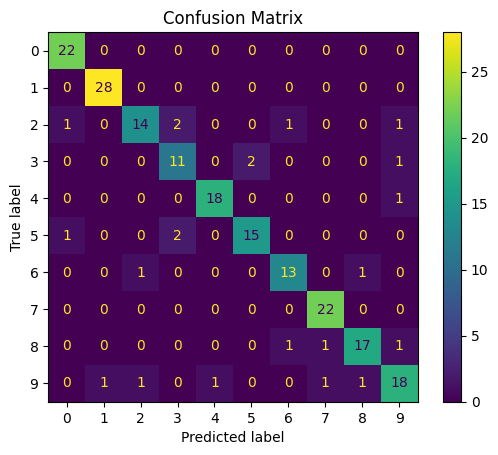

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.97      1.00      0.98        28
           2       0.88      0.74      0.80        19
           3       0.73      0.79      0.76        14
           4       0.95      0.95      0.95        19
           5       0.88      0.83      0.86        18
           6       0.87      0.87      0.87        15
           7       0.92      1.00      0.96        22
           8       0.89      0.85      0.87        20
           9       0.82      0.78      0.80        23

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200

Cross validation scores:
Accuracy: [0.85 0.85 0.65 0.7  0.85 0.55 0.8  0.8  0.7  0.6 ]
Precision macro: [0.91666667 0.775      0.52333333 0.68333333 0.78333333 0.44333333
 0.675      0.725      0.625      0.59166667]
R

In [131]:
clf = xgboost.XGBClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)
display_metrics(clf, X_test, y_test, y_pred, multiclass=True)